### Implementation of K-means method. It returns a dict containing cluster points & labels, an array containg cluster mean vectors

In [ ]:
import pandas as pd
import numpy as np
import random

def kmeans(input_array, k):

  n_samples = input_array.shape[0]
  n_features = input_array.shape[1]

  random_index = np.random.choice(n_samples, k, replace=False)
  mean_vectors = input_array[random_index]

  clusters = {} #clusters dict
  for i in range(k):
    clusters[str(i)] = []

  clusters['labels'] = np.full(n_samples, -1)

  while True:
    for j in range(k):
      clusters[str(j)] = [] #clear the points in clusters at the start of iteration

    clusters['labels'] = np.full(n_samples, -1)

    for i in range(len(input_array)):

      distance = []
      for l in range(k):
        distance_l = np.sum((input_array[i] - mean_vectors[l]) ** 2, axis=0)
        distance.append(distance_l)

      new_cluster_index = np.argmin(distance)
      clusters[str(new_cluster_index)].append(input_array[i])
      clusters['labels'][i] = new_cluster_index + 1

    mean_vectors_old = mean_vectors.copy()
    for c in range(k):
        mean = np.mean(np.array(clusters[str(c)]), axis=0)
        mean_vectors[c] = mean

    if np.all(mean_vectors_old == mean_vectors):
        break
        
  return clusters, mean_vectors

### Generate RBF Kernel matrix

In [ ]:
from numpy import exp

def get_rbf_kernel(input_array, sigma):
    
  num_data_points = input_array.shape[0]
  dist_pairwise = np.zeros((num_data_points, num_data_points))
  for i in range(num_data_points):
    distances = np.sum((input_array - input_array[i]) ** 2, axis=1)
    dist_pairwise[:, i] = distances
    
  gamma = 1/(2 * ((sigma) ** 2))
  K = exp(-gamma * dist_pairwise.T)

  return K

### Generate Polynomial Kernel matrix

In [ ]:
def get_poly_kernel(input_array, degree=2, coef=1.0):
  K = input_array.dot(input_array.T) #Compute pairwise dot product of the data points
  K += coef
  K **= degree
  return K

### Spectral clustering

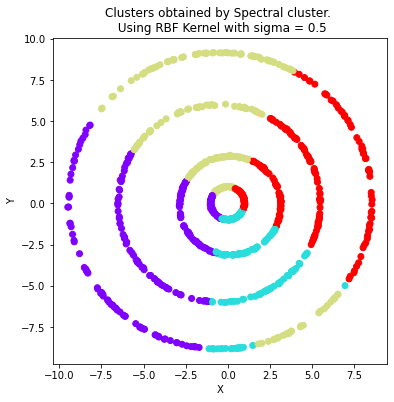

In [ ]:
import pandas as pd
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

input_df = pd.read_csv("/content/Dataset.csv", names=['x', 'y']);
input_data  = input_df.iloc[:, :].values

num_clusters = 4;

kernel_matrix = get_rbf_kernel(input_data, 0.5)
#kernel_matrix = get_poly_kernel(input_data)

eigvals, eigvecs = eigh(kernel_matrix)
eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

h_star = np.column_stack([eigvecs[:, i] for i in range(num_clusters)]) 

norms = np.sqrt(np.sum(np.square(h_star),axis=1))
norms = norms.reshape(norms.size, 1)

h_star = h_star / norms

cluster_dicts, means = kmeans(h_star, num_clusters)

plt.figure(figsize=(6,6))
plt.scatter(input_data[:, 0], input_data[:,1], c=cluster_dicts['labels'], cmap='rainbow')
plt.title("Clusters obtained by Spectral cluster. \n Using RBF Kernel with sigma = 0.5")
#plt.title("Clusters obtained by Spectral cluster. \n Using Polynomial Kernel with degree = 2")
plt.xlabel("X")
plt.ylabel("Y")

#plt.grid()
plt.show()